# 第 4 章：神经网络基础

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

## 逻辑回归

### 数据集

从 `sklearn` 库中导入 `make_moon` 数据集

In [2]:
import sklearn.datasets

np.random.seed(1)    # 设置随机种子
X, Y = sklearn.datasets.make_moons(n_samples=200, noise=.2)    # 导入 make_moon 数据集，样本个数 m=200，噪声标准差为 0.2
X, Y = X.T, Y.reshape(1, Y.shape[0])    # X shape: [2,200]，Y shape: [1,200]
m = X.shape[1]    # 样本个数
dim = X.shape[0]    # 特征维度

In [3]:
print('X shape: ', X.shape)
print('Y shape: ', Y.shape)

X shape:  (2, 200)
Y shape:  (1, 200)


绘制数据分布散点图

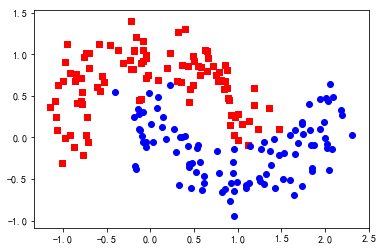

In [4]:
plt.scatter(X[0, Y[0,:]==0], X[1, Y[0,:]==0], c='r', marker='s')    # 负类
plt.scatter(X[0, Y[0,:]==1], X[1, Y[0,:]==1], c='b', marker='o')    # 正类
plt.show()

### 梯度下降优化算法

代价函数（Cost Fucntion）：

$$J=-\frac{1}{m}\sum_{i=1}^{m}y^{(i)}log\hat y^{(i)}+(1-y^{(i)})log(1-\hat y^{(i)})$$

梯度下降（Gradient Descent）：

$$\frac{\partial J}{\partial W} = \frac{1}{m}X(\hat Y-Y)^T$$
$$\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (\hat y^{(i)}-y^{(i)})$$

定义 Sigmoid 函数：

In [5]:
def sigmoid(x):
    """
    函数输入：
        - x：sigmoid 函数输入

    函数输出：
        - y：sigmoid 输出
    """
    y = 1 / (1 + np.exp(-x))
    
    return y

定义逻辑回归优化算法：

In [6]:
def optimizer(X, Y, num_iterations=200, learning_rate=0.01):
    """
    函数输入：
        - X：输入数据特征，维度 = (dim, m)
        - Y：输入数据标签，维度 = (1, m)
        - num_iteration：训练次数
        - learning_rate：学习速率
    函数输出：
        - W：训练后的权重参数
        - b：训练后的偏置参数
        - cost：每次训练计算的损失存放在 cost 列表中
    """
    cost = []         # 列表，存放每次训练的损失
    m = X.shape[1]    # 样本个数
    dim = X.shape[0]  # 特征维度
    
    # 参数初始化
    W = np.zeros((dim, 1))
    b = 0
    
    # 迭代训练
    for i in range(num_iterations):
        Z = np.dot(W.T, X) + b    # 线性部分
        Y_hat = sigmoid(Z)    # 非线性部分
        J = -1.0 / m * np.sum(Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat))    # 代价函数
        cost.append(J)
        
        # 梯度下降
        dW = 1.0 / m * np.dot(X, (Y_hat - Y).T)
        db = 1.0 / m * np.sum(Y_hat - Y)
        W = W - learning_rate * dW    # W 更新公式
        b = b - learning_rate * db    # b 更新公式
    
        if (i+1) % 20 == 0:
            print('Iteration: %d, J = %f' % (i+1, J))
        
    return W, b, cost

### 训练

In [7]:
W, b, cost = optimizer(X, Y, num_iterations=1000, learning_rate=0.1)

Iteration: 20, J = 0.566442
Iteration: 40, J = 0.496925
Iteration: 60, J = 0.455583
Iteration: 80, J = 0.428317
Iteration: 100, J = 0.408968
Iteration: 120, J = 0.394467
Iteration: 140, J = 0.383137
Iteration: 160, J = 0.373990
Iteration: 180, J = 0.366413
Iteration: 200, J = 0.360008
Iteration: 220, J = 0.354504
Iteration: 240, J = 0.349710
Iteration: 260, J = 0.345489
Iteration: 280, J = 0.341740
Iteration: 300, J = 0.338385
Iteration: 320, J = 0.335364
Iteration: 340, J = 0.332631
Iteration: 360, J = 0.330146
Iteration: 380, J = 0.327878
Iteration: 400, J = 0.325803
Iteration: 420, J = 0.323897
Iteration: 440, J = 0.322143
Iteration: 460, J = 0.320525
Iteration: 480, J = 0.319029
Iteration: 500, J = 0.317644
Iteration: 520, J = 0.316360
Iteration: 540, J = 0.315166
Iteration: 560, J = 0.314056
Iteration: 580, J = 0.313022
Iteration: 600, J = 0.312057
Iteration: 620, J = 0.311156
Iteration: 640, J = 0.310314
Iteration: 660, J = 0.309526
Iteration: 680, J = 0.308788
Iteration: 700, J 

训练后的参数 $W$ 和 $b$

In [8]:
print('W = ', W)
print('b = ', b)

W =  [[ 1.14042339]
 [-3.83196763]]
b =  0.3501017350326183


显示训练过程中的损失 cost

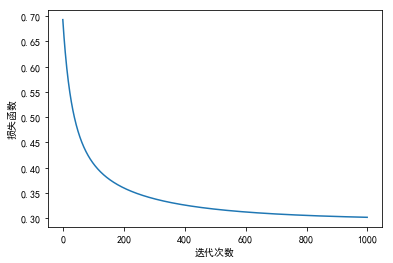

In [9]:
plt.plot(cost)
plt.xlabel('迭代次数')
plt.ylabel('损失函数')
plt.show()

### 预测

定义预测函数

In [10]:
def predict(X, W, b):
    """
    函数输入：
        - X：输入数据特征，维度 = (dim, m)
        - W：训练后的权重参数
        - b：训练后的偏置参数
    函数输出：
        - Y_pred：预测输出标签，维度 = (1, m)
    """
    
    Y_pred = np.zeros((1, X.shape[1]))    # 初始化 Y_pred
    
    Z = np.dot(W.T, X) + b    # 线性部分
    Y_hat = sigmoid(Z)    # 非线性部分
    Y_pred[Y_hat > 0.5] = 1    # Y_hat 大于 0.5 的预测为正类

    return Y_pred

对输入数据 X 进行预测

In [11]:
Y_pred = predict(X, W, b)
print(Y_pred)

[[0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.
  1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
  1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.
  1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
  0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
  0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.
  1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1.
  1. 1. 0. 1. 1. 0. 1. 0.]]


计算预测准确率

In [12]:
accuracy = np.mean(Y_pred == Y)
print(accuracy)

0.86


绘制分类直线，可视化分类效果

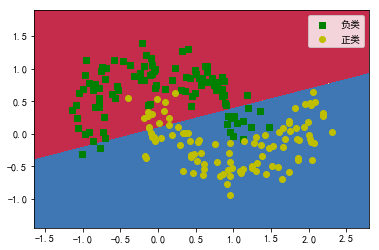

In [13]:
from matplotlib.colors import ListedColormap
    
x_min, x_max = X[0, :].min() - 0.5, X[0, :].max() + 0.5
y_min, y_max = X[1, :].min() - 0.5, X[1, :].max() + 0.5
step = 0.001
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
Z = predict(np.c_[xx.ravel(), yy.ravel()].T, W, b)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)    # 绘制边界
plt.scatter(X[0, Y[0,:]==0], X[1, Y[0,:]==0], c='g', marker='s', label='负类')    # 负类
plt.scatter(X[0, Y[0,:]==1], X[1, Y[0,:]==1], c='y', marker='o', label='正类')    # 正类
plt.legend()
plt.show()